# Make a simple convolutional neural network and train / test on MNIST Digits data

- Arun Aniyan
- arun@ska.ac.za
- SKA SA

In [1]:
from sklearn import datasets, cross_validation
from sknn.mlp import Classifier, Layer, Convolution
import matplotlib.pyplot as pylab
%pylab inline

Couldn't import dot_parser, loading of dot files will not be possible.


/home/arun/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
# Load the data and split it into subsets for training and testing.
digits = datasets.load_digits()
X = digits.images
y = digits.target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)


#### The Convolutional Neural Network
This will be simple network with two convolutional layers, a ReLU layer and the Softmax layer to get the probability

In [3]:
# Create a neural network that uses convolution to scan the input images.
nn = Classifier(
    layers=[
        Convolution('Rectifier', channels=8, kernel_shape=(3, 3), border_mode='valid'),
        Convolution('Rectifier', channels=10, kernel_shape=(3, 3), border_mode='valid'),
        Layer('Rectifier', units=64),
        Layer('Softmax')],
    learning_rate=0.002,
    valid_size=0.2,
    n_stable=10,
    verbose=True)

# Train the network
nn.fit(X_train, y_train)


/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/usr/local/lib/python2.7/dist-packages/lasagne/layers/conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=border_mode)


Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Convolution `Rectifier`: channels=8, scale_factor=(1, 1), name=u'hidden0', frozen=False, kernel_shape=(3, 3), kernel_stride=(1, 1), pool_shape=(1, 1), border_mode='valid'>,
      hidden1=<sknn.nn.Convolution `Rectifier`: channels=10, scale_factor=(1, 1), name=u'hidden1', frozen=False, kernel_shape=(3, 3), kernel_stride=(1, 1), pool_shape=(1, 1), border_mode='valid'>,
      hidden2=<sknn.nn.Layer `Rectifier`: units=64, name=u'hidden2', frozen=False>,
      layers=[<sknn.nn.Convolution `Rectifier`: channels=8, scale_factor=(1, 1), name=u'hidden0', frozen=False, kernel_shape=(3, 3), kernel_stride=(1, 1), pool_shape=(1, 1), border_mode='valid'>, <sknn.nn.Convolution `Rectifier`: channels=10, scale_factor=(1, 1), name=u'hidden1', frozen=False, kernel_shap..., name=u'hidden2', frozen=False>, <sknn.nn.Layer `Softmax`: units=10, name=u'output', frozen=False>],
      learning_mom

In [4]:
# Determine how well it does on training data and unseen test data.
print('TRAIN SCORE', nn.score(X_train, y_train))
print('TEST SCORE', nn.score(X_test, y_test))

y_pred = nn.predict(X_test)



('TRAIN SCORE', 0.98816979819067496)
('TEST SCORE', 0.96666666666666667)


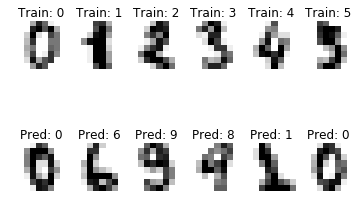

In [5]:

for index, (image, label) in enumerate(zip(digits.images[:6], digits.target[:6])):
    pylab.subplot(2, 6, index + 1)
    pylab.axis('off')
    pylab.imshow(image, cmap=pylab.cm.gray_r, interpolation='nearest')
    pylab.title('Train: %i' % label)

for index, (image, prediction) in enumerate(zip(X_test[:6], y_pred[:6])):
    pylab.subplot(2, 6, index + 7)
    pylab.axis('off')
    pylab.imshow(image.reshape((8,8)), cmap=pylab.cm.gray_r, interpolation='nearest')
    pylab.title('Pred: %i' % prediction)

